### Problem Statement:
##### Checking if YOUTUBE comment is spam or not.

In [1]:
#immport lib:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data:
df=pd.read_csv('https://raw.githubusercontent.com/sumathi16/Datasets/master/Youtube05-Shakira.csv')
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [3]:
#Comment_ID can be can be dropped as it has no significance
##Create a new DF with required columns
df.drop(['COMMENT_ID','AUTHOR','DATE'],axis=1,inplace=True)
df.head()

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0


In [4]:
df.shape

(370, 2)

In [5]:
#Check for missing values if there are any remove them
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [6]:
#there are no missing values

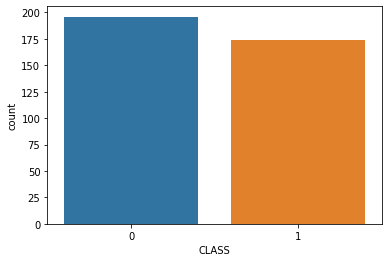

0    196
1    174
Name: CLASS, dtype: int64


In [7]:
#Draw a count plot using seaborn for the column Class. Check how many records are there for spam and ham.
sns.countplot(df.CLASS)
plt.show()
print(df.CLASS.value_counts())

#### Here '0'--> Ham ; '1'--> Spam
there are 196 ham Comments and 174 Spam Comments

In [8]:
#Apply CountVectorizer on the column Content
##Import the libd required:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tv = TfidfVectorizer()
#first lets split the data:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.CONTENT,df.CLASS,test_size=0.2,random_state=1)

In [9]:
##Convert the count vectorizer output into a dataframe
cv_X_train=pd.DataFrame(data=cv.fit_transform(X_train).toarray(),columns=cv.get_feature_names())
cv_X_test=pd.DataFrame(data=cv.transform(X_test).toarray(),columns=cv.get_feature_names())

In [10]:
#Apply Naive Bayes and check the metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb=GaussianNB()
#training the model
gnb.fit(cv_X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
#predicting on train data
cv_y_train_pred=gnb.predict(cv_X_train)

In [12]:
#predicting on test data
cv_y_test_pred=gnb.predict(cv_X_test)

In [13]:
##Convert the count vectorizer output into a dataframe
tv_X_train=pd.DataFrame(data=tv.fit_transform(X_train).toarray(),columns=tv.get_feature_names())
tv_X_test=pd.DataFrame(data=tv.transform(X_test).toarray(),columns=tv.get_feature_names())

In [14]:
#Apply Naive Bayes and check the metrics
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
#training the model
gnb.fit(tv_X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
#predicting on train data
tv_y_train_pred=gnb.predict(tv_X_train)

In [16]:
#predicting on test data
tv_y_test_pred=gnb.predict(tv_X_test)

In [17]:
#Check the metrics
print('Metrics on CountVectorizer:\n')
print('\ntrain data:\n')
print(classification_report(y_train,cv_y_train_pred))
print('\ntest data:\n')
print(classification_report(y_test,cv_y_test_pred))
print('\nMetrics on TfidfVectorizer:\n')
print('\ntrain data:\n')
print(classification_report(y_train,tv_y_train_pred))
print('\ntest data:\n')
print(classification_report(y_test,tv_y_test_pred))

Metrics on CountVectorizer:


train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       139

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296


test data:

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        39
           1       0.80      1.00      0.89        35

    accuracy                           0.88        74
   macro avg       0.90      0.88      0.88        74
weighted avg       0.90      0.88      0.88        74


Metrics on TfidfVectorizer:


train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       139

    accuracy                           1.00       296
   macro avg       1.00     